In [ ]:
! pip install transformers

     |████████████████████████████████| 3.4 MB 5.3 MB/s 
     |████████████████████████████████| 67 kB 4.0 MB/s 
     |████████████████████████████████| 895 kB 54.9 MB/s 
     |████████████████████████████████| 3.3 MB 47.2 MB/s 
     |████████████████████████████████| 596 kB 65.0 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


## Load Transformer container

In [ ]:
! pip install transformers
! pip install javalang
! pip install flair

     |████████████████████████████████| 3.4 MB 7.7 MB/s 
     |████████████████████████████████| 895 kB 49.4 MB/s 
     |████████████████████████████████| 3.3 MB 56.5 MB/s 
     |████████████████████████████████| 596 kB 56.2 MB/s 
     |████████████████████████████████| 67 kB 4.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 322 kB 7.1 MB/s 
     |████████████████████████████████| 981 kB 49.9 MB/s 
     |████████████████████████████████| 48 kB 5.2 MB/s 
     |████████████████████████████████| 64 kB 3.0 MB/s 
     |████████████████████████████████| 1.2 MB 42.0 MB/s 
     |████████████████████████████████| 788 kB 48.3 MB/s 
     |████████████████████████████████| 19.7 MB 1.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |███████████████████████████████

In [ ]:
! unzip /content/pytorchModelBertCode.zip
! mv /content/content/cased-BertCode /content

Archive:  /content/pytorchModelBertCode.zip
   creating: content/cased-BertCode/
  inflating: content/cased-BertCode/vocab.txt  
  inflating: content/cased-BertCode/config.json  
  inflating: content/cased-BertCode/pytorch_model.bin  
   creating: content/cased-BertCode/.ipynb_checkpoints/
  inflating: content/cased-BertCode/bert_config.json  


In [ ]:
import torch
from flair.data import Sentence
from flair.models import SequenceTagger
from transformers import BertModel, BertTokenizer, BertForPreTraining, BertConfig
model = BertForPreTraining.from_pretrained('/content/cased-BertCode', output_attentions=True, output_hidden_states=True )

In [ ]:
BertConfig.from_pretrained('/content/cased-BertCode')

BertConfig {
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.15.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 50000
}

In [ ]:
model.config

BertConfig {
  "_name_or_path": "/content/cased-BertCode",
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "output_attentions": true,
  "output_hidden_states": true,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.15.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 50000
}

In [ ]:
tokenizer = BertTokenizer.from_pretrained('/content/cased-BertCode/vocab.txt', do_lower_case=False)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:1648: FutureWarning: Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated and won't be possible anymore in v5. Use a model identifier or the path to a directory instead.
  FutureWarning,


In [ ]:
import json
import pandas as pd
import numpy as np
import javalang
import os

In [ ]:
def tokenize(code_snippet):# this was not here previously so remove if you want
  tree = list(javalang.tokenizer.tokenize(code_snippet))
  tokens = []
  types = []
  for i in tree:
    j = str(i)
    j = j.split()
    typee = j[0]
    token = j[1].strip('"')
    if typee=="DecimalInteger":
      token = "NUM"
    elif typee.lower()=="string":
      token="STR"
    tokens.append(token)

  return " ".join(tokens)

In [ ]:
#!pip install filelock more_itertools
import pandas as pd
import numpy as np 
#import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
np.random.seed(0)
import seaborn as sns
obj = pd.read_json("java_test_0.jsonl", lines=True)
new_codes = obj["original_string"].values

In [ ]:
obj

repo  ... partition
0         ReactiveX/RxJava  ...      test
1         ReactiveX/RxJava  ...      test
2         ReactiveX/RxJava  ...      test
3         ReactiveX/RxJava  ...      test
4         ReactiveX/RxJava  ...      test
...                    ...  ...       ...
26904  intellimate/IzouSDK  ...      test
26905  intellimate/IzouSDK  ...      test
26906       abmargb/jamppa  ...      test
26907       abmargb/jamppa  ...      test
26908       abmargb/jamppa  ...      test

[26909 rows x 12 columns]

In [ ]:
allTokenizedCode = []
for index, code in enumerate(new_codes):
  splittedCode = code.split("\n")
  s = ""
  try:
    for eachLine in splittedCode:
      tokenizedCode = tokenize(eachLine)
      if tokenizedCode.strip(" ")=="":
        print(eachLine)
        continue
      else:
        s = s + tokenizedCode + " \n "
    allTokenizedCode.append(s)
    s = ""
  except:
    print("RMRD************ERROR-WAS-THROWN**************RMRD" + str(index))

Streaming output truncated to the last 5000 lines.
        // search? or just recursive exploration. I think it will need to be a DFS.



            // Labels the entry point to each choice point.

            // Label for the entry point to the next choice point, to backtrack to.

                // try me else.
                // retry me else.
                // trust me.


            // Select a non-default built-in implementation to compile the functor with, if it is a built-in.


            // The 'isFirstBody' parameter is only set to true, when this is the first functor of a rule.

            // Call the body. The number of permanent variables remaining is specified for environment trimming.

            // Proceed if this disjunctive branch completes successfully. This does not need to be done for the last
            // branch, as the continuation point will come immediately after.


        // Left argument.

        // Right argument.

        // Evaluate both sides of 

In [ ]:
def getSubsets(numb, allNumbs):
  if numb==1 or numb==0:
    return [(0,1)]
  else:
    allNumbs = getSubsets(numb-1, allNumbs)
    allNumbs.append((numb-1,numb))
    return allNumbs

## Getting the two consecutive sequences in code and storing the logest sequences in bestSampleWithMaxPairLength

The formating is [CLS] +  sentence1 + [SEP]  + sentence2 +  [SEP]

In [ ]:
bestSampleWithMaxPairLength = []
bestSampleWithMaxPairLength_LEN =[]
for each_code in allTokenizedCode:
  splittedCode = each_code.split("\n")
  subsets = getSubsets(len(splittedCode), [])
  bestStr = "[CLS] "+ splittedCode[subsets[0][0]].strip(" ") + " [SEP] " + splittedCode[subsets[0][1]].strip(" ") + " [SEP]"
  bestLen = len(bestStr.split(" "))
  for eachSet in subsets[:len(subsets)-1]:
    concatCode = "[CLS] " + splittedCode[eachSet[0]].strip(" ") + " [SEP] " + splittedCode[eachSet[1]].strip(" ") + " [SEP]"
    if len(concatCode.split(" "))>bestLen:
      bestLen = len(concatCode.split(" "))
      bestStr =  concatCode 
  bestSampleWithMaxPairLength.append(bestStr)
  bestSampleWithMaxPairLength_LEN.append(bestLen)

In [ ]:
#!pip install filelock more_itertools
import pandas as pd
import numpy as np 
#import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
np.random.seed(0)
import seaborn as sns
RED = "#e74c3c"
import collections
import pickle

import matplotlib
import numpy as np
import seaborn as sns
import sklearn

from matplotlib import pyplot as plt
from matplotlib import cm
from sklearn import manifold

sns.set_style("darkgrid")
# Pretty colors
BLACK = "k"
GREEN = "#59d98e"
SEA = "#159d82"
BLUE = "#3498db"
PURPLE = "#9b59b6"
GREY = "#95a5a6"
RED = "#e74c3c"
ORANGE = "#f39c12"

## keeping just the sequences for which the sequence length after tokenization is less than or equal to 128')

In [ ]:
lengths=[]
codes=[]
for index, code in enumerate(bestSampleWithMaxPairLength):
  l = len(tokenizer.tokenize(code))
  if l<=128:
    lengths.append(l)
    codes.append(code)

In [ ]:
codes = codes[:2000]

In [ ]:
from tqdm import tqdm

## Checking For reducdancy in attention

In [ ]:
print("Computing head distances")
js_distances = np.zeros([144, 144])
for eachCode in tqdm(codes):
  
  input_ids = torch.tensor(tokenizer.convert_tokens_to_ids(tokenizer.tokenize(eachCode)))
  input_ids = input_ids.reshape(1,-1)
  #_attention = model(input_ids)[-1]### attention shape is layers, batchsize, heads, sentLen, sentLen
  output_from_model = model(input_ids)
  _attention = output_from_model["attentions"]
  act = []
  for each in range(12):
    act.append(_attention[each][0].detach().cpu().numpy())
  
  act = np.array(act)

  attns_flat = act.reshape([144, act.shape[2], act.shape[3]])
  for head in range(144):
    head_attns = np.expand_dims(attns_flat[head], 0)
    head_attns_smoothed = (0.001 / head_attns.shape[1]) + (head_attns * 0.999)
    attns_flat_smoothed = (0.001 / attns_flat.shape[1]) + (attns_flat * 0.999)
    m = (head_attns_smoothed + attns_flat_smoothed) / 2
    js = -head_attns_smoothed * np.log(m / head_attns_smoothed)
    js += -attns_flat_smoothed * np.log(m / attns_flat_smoothed)
    js /= 2
    js = js.sum(-1).sum(-1)/144
    js_distances[head] += js

Computing head distances


100%|██████████| 2000/2000 [23:25<00:00,  1.42it/s]


In [ ]:
updated = js_distances

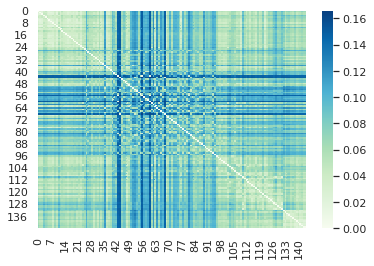

In [ ]:
import numpy as np
np.random.seed(0)
import seaborn as sns
sns.set_theme()
ax = sns.heatmap(updated/len(codes), cmap='GnBu')

## Defining the dictionary

In [ ]:
avg_attns = {
    k: np.zeros((12, 12)) for k in [
      "self", "right", "left", "sep", "sep_sep", "rest_sep",
      "cls", "all_basictype", "all_identifier", "all_keyword", "all_modifier", "all_operator", "all_separator",
      "cls_idf", "basictype_idf", "identifier_idf", "keyword_idf", "modifier_idf", "operator_idf", "separator_idf", "sep_idf"
      ,"all_function", "all_object", "all_class", "all_return-type"
      ]
}

## Calulating Average attention put on CLS token

In [ ]:
cls_data = np.zeros((12,12))

with torch.no_grad():
  for eachCode in tqdm(codes):
    input_ids = torch.tensor(tokenizer.convert_tokens_to_ids(tokenizer.tokenize(eachCode)))
    input_ids = input_ids.reshape(1,-1)
    output_from_model = model(input_ids)
    _attention = output_from_model["attentions"]# attention shape is layers, batchsize, heads, tokenLen, tokenLen
    
    for layer in range(12):
      for head in range(12):
        cls_data[layer][head] += _attention[layer][0][head][:, 0:1].mean().cpu().detach().numpy() 

cls_data = cls_data/len(codes)

100%|██████████| 2000/2000 [07:26<00:00,  4.48it/s]


In [ ]:
avg_attns['cls'] = cls_data

## Calculating Average attention put on SEP token

In [ ]:
sep_data = np.zeros((12,12))

with torch.no_grad():
  for eachCode in tqdm(codes):
    input_ids = torch.tensor(tokenizer.convert_tokens_to_ids(tokenizer.tokenize(eachCode)))
    input_ids = input_ids.reshape(1,-1)
    output_from_model = model(input_ids)
    _attention = output_from_model["attentions"]# attention shape is layers, batchsize, heads, tokenLen, tokenLen
    
    for layer in range(12):
      for head in range(12):
        for each_sep_index in torch.where(input_ids[0]==3)[0].cpu().detach().numpy():
          sep_data[layer][head] += _attention[layer][0][head][:, each_sep_index].mean().cpu().detach().numpy() 

sep_data = sep_data/len(codes)

100%|██████████| 2000/2000 [07:41<00:00,  4.33it/s]


In [ ]:
avg_attns['sep'] = sep_data

## Calculating Average Attention put on token itself

In [ ]:
itself_data = np.zeros((12,12))

with torch.no_grad():
  for eachCode in tqdm(codes):
    input_ids = torch.tensor(tokenizer.convert_tokens_to_ids(tokenizer.tokenize(eachCode)))
    input_ids = input_ids.reshape(1,-1)
    output_from_model = model(input_ids)
    _attention = output_from_model["attentions"]# attention shape is layers, batchsize, heads, tokenLen, tokenLen
    
    for layer in range(12):
      for head in range(12):
        itself_data[layer][head] += torch.diag(_attention[layer][0][head],0).mean().cpu().detach().numpy()

itself_data = itself_data/len(codes)

100%|██████████| 2000/2000 [07:30<00:00,  4.44it/s]


In [ ]:
avg_attns['self'] = itself_data

## Calculating Average Attention put on LEFT token

In [ ]:
itself_data = np.zeros((12,12))

with torch.no_grad():
  for eachCode in tqdm(codes):
    input_ids = torch.tensor(tokenizer.convert_tokens_to_ids(tokenizer.tokenize(eachCode)))
    input_ids = input_ids.reshape(1,-1)
    output_from_model = model(input_ids)
    _attention = output_from_model["attentions"]# attention shape is layers, batchsize, heads, tokenLen, tokenLen
    length = _attention[0][0][0].shape[0]
    indexes =[]
    if length>0:
      for i in range(1,length,3):
        if i<length-1:
          indexes.append(i)
      for layer in range(12):
        for head in range(12):
          for index_for_attention in indexes:
            itself_data[layer][head] += _attention[layer][0][head][:, index_for_attention-1].mean().cpu().detach().numpy() 
      #itself_data = itself_data/len(indexes)
itself_data = itself_data/len(codes)

100%|██████████| 2000/2000 [08:28<00:00,  3.93it/s]


In [ ]:
avg_attns['left'] = itself_data

## Calculating Average Attention put on RIGHT token

In [ ]:
itself_data = np.zeros((12,12))

with torch.no_grad():
  for eachCode in tqdm(codes):
    input_ids = torch.tensor(tokenizer.convert_tokens_to_ids(tokenizer.tokenize(eachCode)))
    input_ids = input_ids.reshape(1,-1)
    output_from_model = model(input_ids)
    _attention = output_from_model["attentions"]# attention shape is layers, batchsize, heads, tokenLen, tokenLen
    length = _attention[0][0][0].shape[0]
    indexes =[]
    if length>0:
      for i in range(1,length,3):
        if i<length-1:
          indexes.append(i)
      for layer in range(12):
        for head in range(12):
          for index_for_attention in indexes:
            itself_data[layer][head] += _attention[layer][0][head][:, index_for_attention+1].mean().cpu().detach().numpy() 
      #itself_data = itself_data/len(indexes)
itself_data = itself_data/len(codes)

100%|██████████| 2000/2000 [08:26<00:00,  3.95it/s]


In [ ]:
avg_attns['right'] = itself_data

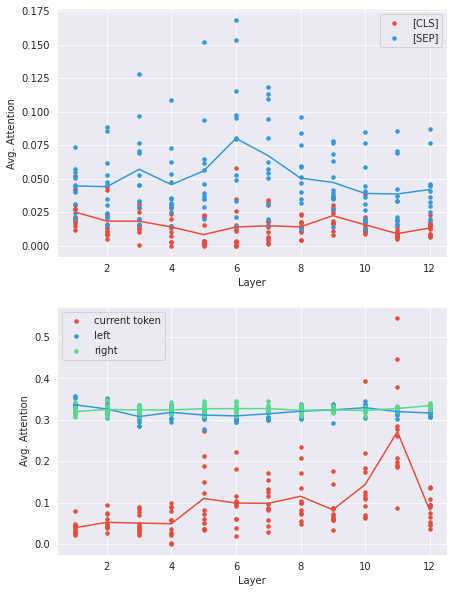

In [ ]:
def get_data_points(head_data):
  xs, ys, avgs = [], [], []
  for layer in range(12):
    for head in range(12):
      ys.append(head_data[layer, head])
      xs.append(1 + layer)
    avgs.append(head_data[layer].mean())
  return xs, ys, avgs


## thi is with 2 enfding functions

def add_line(key, ax, color, label, plot_avgs=True):
  xs, ys, avgs = get_data_points(avg_attns[key])
  ax.scatter(xs, ys, s=12, label=label, color=color)
  if plot_avgs:
    ax.plot(1 + np.arange(len(avgs)), avgs, color=color)
  ax.legend(loc="best")
  ax.set_xlabel("Layer")
  ax.set_ylabel("Avg. Attention")


plt.figure(figsize=(7, 21))
ax = plt.subplot(4, 1, 1)
for key, color, label in [ ("cls", RED, "[CLS]"),("sep", BLUE, "[SEP]")]:
  add_line(key, ax, color, label)


ax = plt.subplot(4, 1, 2)
for key, color, label in [("self", RED, "current token"), ("left", BLUE, "left"),("right", GREEN, "right")]:
  add_line(key, ax, color, label, plot_avgs=True)

#ax = plt.subplot(4, 1, 3)
#for key, color, label in [("all_identifier", GREEN, "IDF"),("all_separator", RED, "SEPS")]:
#  add_line(key, ax, color, label, plot_avgs=True)
#
#ax = plt.subplot(4, 1, 4)
#for key, color, label in [("all_operator", GREEN, "OP"),("all_basictype", RED, "DTP"),("all_keyword", BLUE, "KEY"),("all_modifier", PURPLE, "MOD")]:
#  add_line(key, ax, color, label, plot_avgs=True)

plt.show()

## AVERAGE Attention on Syntactic Types

## Getting the syntactic types

In [ ]:
def get_syntax_types_for_code(code_snippet, firstSepIndex):
  types = ["[CLS]"]
  tree = list(javalang.tokenizer.tokenize(code_snippet))
  for i in tree:
    j = str(i)
    j = j.split()
    if j[1]=='"STR"':
      types.append("string")
    elif j[1]=='"NUM"':
      types.append("number")
    else:
      types.append(j[0].lower())
  types.append("[SEP]")
  types.insert(firstSepIndex, "[SEP]")
  return np.array(types)

In [ ]:
def semicolon(code_snippet, firstSepIndex):
  types = ["[CLS]"]
  tree = list(javalang.tokenizer.tokenize(code_snippet))
  for i in tree:
    j = str(i)
    j = j.split()
    #print(j[1], " ", j[0])
    types.append(j[1])
  types.append("[SEP]")
  types.insert(firstSepIndex, "[SEP]")
  return np.array(types)

In [ ]:
#def get_reindexed_types(code, types, tokenizer):
#  reindexed_types = []
#  for index, each_token in enumerate(code.split()):
#    tokenized_list = tokenizer.tokenize(each_token)
#    for i in range(len(tokenized_list)):
#      reindexed_types.append(types[index])
#  return reindexed_types

In [ ]:
def get_start_end_of_token_when_tokenized(code, types, tokenizer):
  reindexed_types = []
  start = 0
  end = 0
  for index, each_token in enumerate(code.split()):
    tokenized_list = tokenizer.tokenize(each_token)
    for i in range(len(tokenized_list)):
      end += 1
    reindexed_types.append((start, end-1))
    start = end
  return reindexed_types

## Identifier

In [ ]:
def getSyntaxData2(codes, tokenizer, syntaxType):

  with torch.no_grad():
    identifier = np.zeros((12,12))
    for eachCode in tqdm(codes):
      input_ids = torch.tensor(tokenizer.convert_tokens_to_ids(tokenizer.tokenize(eachCode)))
      input_ids = input_ids.reshape(1,-1)
      output_from_model = model(input_ids)
      _attention = output_from_model["attentions"]# attention shape is layers, batchsize, heads, tokenLen, tokenLen
      firstSepIndex = np.where(np.array(eachCode.split(" ")) == "[SEP]")[0][0]
      types = get_syntax_types_for_code(eachCode.replace("[CLS] ", "").replace(" [SEP]", ""), firstSepIndex)
      start_end = get_start_end_of_token_when_tokenized(eachCode, types, tokenizer)

      for layer in range(12):
        for head in range(12):
          for each_sep_index in np.where(types==syntaxType)[0]:
            start_index, end_index = start_end[each_sep_index]
            interim_value = _attention[layer][0][head][:, start_index:end_index+1].mean().cpu().detach().numpy() 
            identifier[layer][head] += interim_value
    identifier = identifier/len(codes)
  return identifier

In [ ]:
def getSyntaxDataRelationship2(codes, tokenizer,syntaxType,  relation_token ):

  with torch.no_grad():
    identifier = np.zeros((12,12))
    for eachCode in tqdm(codes):
      input_ids = torch.tensor(tokenizer.convert_tokens_to_ids(tokenizer.tokenize(eachCode)))
      input_ids = input_ids.reshape(1,-1)
      output_from_model = model(input_ids)
      _attention = output_from_model["attentions"]# attention shape is layers, batchsize, heads, tokenLen, tokenLen
      firstSepIndex = np.where(np.array(eachCode.split(" ")) == "[SEP]")[0][0]
      types = get_syntax_types_for_code(eachCode.replace("[CLS] ", "").replace(" [SEP]", ""), firstSepIndex)
      start_end = get_start_end_of_token_when_tokenized(eachCode, types, tokenizer)
      attention_matrix_indices_to_use = []
      tot_identifiers = 0

      for each_idf_index in np.where(types==syntaxType)[0]:
        start_index_idf, end_index_idf = start_end[each_idf_index] 
        tot_identifiers += 1
        for i in range(start_index_idf, end_index_idf+1):
          attention_matrix_indices_to_use.append(i)
      _att = []
      for _i in range(12):
        _att.append(_attention[_i][ :, :, attention_matrix_indices_to_use, :])
      #_attention = _attention[:, :, :, attention_matrix_indices_to_use, :]
      

      for layer in range(12):
        for head in range(12):
          for each_sep_index in np.where(types==relation_token)[0]:
            start_index, end_index = start_end[each_sep_index]
            interim_value = _att[layer][0][head][:, start_index:end_index+1].mean().cpu().detach().numpy() 
            identifier[layer][head] += interim_value
    identifier = identifier/len(codes)
  return identifier

In [ ]:
avg_attns['all_identifier'] = getSyntaxData2(codes, tokenizer, "identifier")
avg_attns['all_operator']  = getSyntaxData2(codes, tokenizer, "operator")
avg_attns['all_separator'] = getSyntaxData2(codes, tokenizer, "separator")
avg_attns['all_basictype'] = getSyntaxData2(codes, tokenizer, "basictype")
avg_attns['all_keyword']   = getSyntaxData2(codes, tokenizer, "keyword")
avg_attns['all_modifier']  = getSyntaxData2(codes, tokenizer, "modifier")

100%|██████████| 2000/2000 [08:31<00:00,  3.91it/s]


In [ ]:
avg_attns['cls_idf'] = getSyntaxDataRelationship2(codes, tokenizer, "identifier", "[CLS]")
avg_attns['identifier_idf'] = getSyntaxDataRelationship2(codes, tokenizer, "identifier", "identifier")
avg_attns['operator_idf']  = getSyntaxDataRelationship2(codes, tokenizer,"identifier", "operator")
avg_attns['separator_idf'] = getSyntaxDataRelationship2(codes, tokenizer,"identifier", "separator")
avg_attns['basictype_idf'] = getSyntaxDataRelationship2(codes, tokenizer,"identifier", "basictype")
avg_attns['keyword_idf']   = getSyntaxDataRelationship2(codes, tokenizer,"identifier", "keyword")
avg_attns['modifier_idf']  = getSyntaxDataRelationship2(codes, tokenizer,"identifier", "modifier")

100%|██████████| 2000/2000 [08:29<00:00,  3.93it/s]


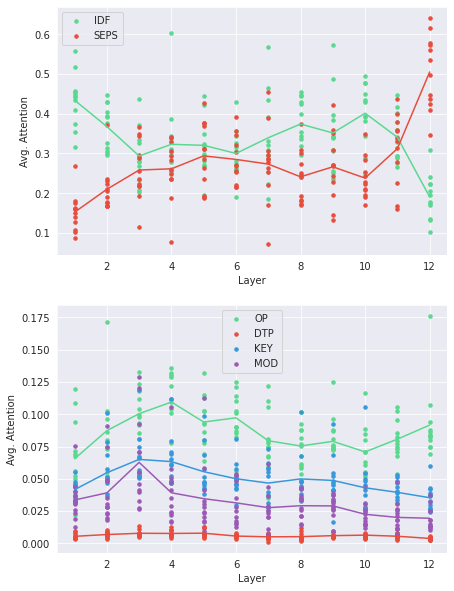

In [ ]:
def get_data_points(head_data):
  xs, ys, avgs = [], [], []
  for layer in range(12):
    for head in range(12):
      ys.append(head_data[layer, head])
      xs.append(1 + layer)
    avgs.append(head_data[layer].mean())
  return xs, ys, avgs

def add_line(key, ax, color, label, plot_avgs=True):
  xs, ys, avgs = get_data_points(avg_attns[key])
  ax.scatter(xs, ys, s=12, label=label, color=color)
  if plot_avgs:
    ax.plot(1 + np.arange(len(avgs)), avgs, color=color)
  ax.legend(loc="best")
  ax.set_xlabel("Layer")
  ax.set_ylabel("Avg. Attention")


plt.figure(figsize=(7, 21))
ax = plt.subplot(4, 1, 1)
for key, color, label in [("all_identifier", GREEN, "IDF"),("all_separator", RED, "SEPS")]:
  add_line(key, ax, color, label, plot_avgs=True)


ax = plt.subplot(4, 1, 2)
for key, color, label in [("all_operator", GREEN, "OP"),("all_basictype", RED, "DTP"),("all_keyword", BLUE, "KEY"),("all_modifier", PURPLE, "MOD")]:
  add_line(key, ax, color, label, plot_avgs=True)



plt.show()

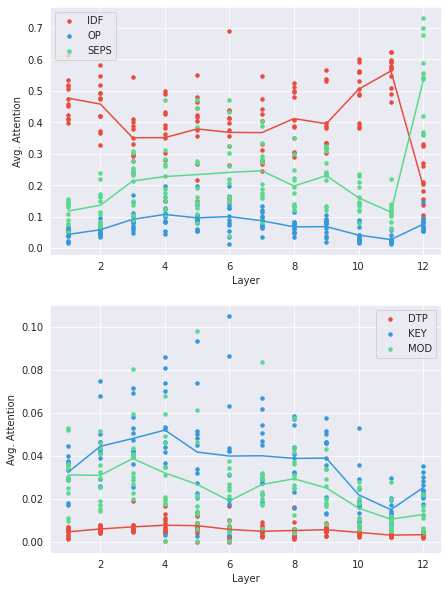

In [ ]:
def get_data_points(head_data):
  xs, ys, avgs = [], [], []
  for layer in range(12):
    for head in range(12):
      ys.append(head_data[layer, head])
      xs.append(1 + layer)
    avgs.append(head_data[layer].mean())
  return xs, ys, avgs

def add_line(key, ax, color, label, plot_avgs=True):
  xs, ys, avgs = get_data_points(avg_attns[key])
  ax.scatter(xs, ys, s=12, label=label, color=color)
  if plot_avgs:
    ax.plot(1 + np.arange(len(avgs)), avgs, color=color)
  ax.legend(loc="best")
  ax.set_xlabel("Layer")
  ax.set_ylabel("Avg. Attention")


plt.figure(figsize=(7, 21))

ax = plt.subplot(4, 1, 1)
for key, color, label in [("identifier_idf", RED, "IDF"),("operator_idf", BLUE, "OP"),("separator_idf", GREEN, "SEPS")]:
  add_line(key, ax, color, label, plot_avgs=True)

ax = plt.subplot(4, 1, 2)
for key, color, label in [("basictype_idf", RED, "DTP"),("keyword_idf", BLUE, "KEY"),("modifier_idf", GREEN, "MOD")]:
  add_line(key, ax, color, label, plot_avgs=True)


plt.show()

## BERTVIZ

In [ ]:
! pip install bertviz

In [ ]:
_attention[0][0][11][0][_attention[0][0][11][0].argmax()]

tensor(0.9865, grad_fn=<SelectBackward>)

In [ ]:
from bertviz import head_view

In [ ]:
tokensss = tokenizer.convert_ids_to_tokens(tokenizer.convert_tokens_to_ids(tokenizer.tokenize(codes[0])))

In [ ]:
head_view(_attention, tokensss)

<IPython.core.display.Javascript object>